In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#### data

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### model

##### hard voting

In [3]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [4]:
voting_clf = VotingClassifier( estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')

In [5]:
voting_clf.fit(X_train, y_train)

C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

#### validation

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.888
VotingClassifier 0.904


C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:19

##### soft voting

In [8]:
svm_clf_prob = SVC(probability=True)

In [9]:
voting_clf_soft = VotingClassifier( estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf_prob)], voting='soft')

In [10]:
for clf in (log_clf, rnd_clf, svm_clf ,svm_clf_prob,voting_clf,voting_clf_soft):
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.888
SVC 0.888
VotingClassifier 0.88
VotingClassifier 0.92


C:\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled 

### Bagging and Pasting in Scikit-Learn

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
bag_clf = BaggingClassifier( DecisionTreeClassifier(), 
                            n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1
                           )

In [14]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [15]:
y_pred = bag_clf.predict(X_test)

In [16]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [17]:
accuracy_score(y_test, y_pred)

0.928

### Obb score

In [29]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,
                            bootstrap=True, n_jobs=-1,
                            oob_score=True)

In [30]:
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [31]:
from sklearn.metrics import accuracy_score 
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [34]:
bag_clf.oob_decision_function_

array([[0.43085106, 0.56914894],
       [0.36571429, 0.63428571],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09659091, 0.90340909],
       [0.33854167, 0.66145833],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.97530864, 0.02469136],
       [0.80645161, 0.19354839],
       [0.00571429, 0.99428571],
       [0.75135135, 0.24864865],
       [0.88888889, 0.11111111],
       [0.97959184, 0.02040816],
       [0.05445545, 0.94554455],
       [0.00540541, 0.99459459],
       [0.9902439 , 0.0097561 ],
       [0.92814371, 0.07185629],
       [1.        , 0.        ],
       [0.01595745, 0.98404255],
       [0.34117647, 0.65882353],
       [0.8994709 , 0.1005291 ],
       [1.        , 0.        ],
       [0.97894737, 0.02105263],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.65405405, 0.34594595],
       [0.

### Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1) 
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
y_pred_rf = rnd_clf.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred_rf)

0.92

#### same as rf

In [39]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
                            n_estimators=500, 
                            max_samples=1.0,
                            bootstrap=True, n_jobs=-1)

### Feature importance

In [41]:
from sklearn.datasets import load_iris

In [43]:
iris = load_iris() 
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1) 
rnd_clf.fit(iris["data"], iris["target"]) 
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):    
    print(name, score)

sepal length (cm) 0.09763311431427232
sepal width (cm) 0.024389899076407456
petal length (cm) 0.4464747549493055
petal width (cm) 0.43150223166001467


##### digital

In [45]:
import numpy as np

In [46]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [47]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

In [50]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

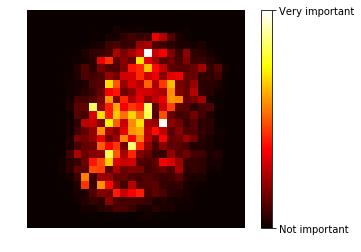

In [51]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

### ada boost

In [52]:
from sklearn.ensemble import AdaBoostClassifier 
ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1),
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [55]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.896

### Gradient Boostint

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [68]:

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [69]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [70]:
y2 = y - tree_reg1.predict(X)

In [71]:
tree_reg2 = DecisionTreeRegressor(max_depth=2)

In [72]:
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [73]:
y3 = y2 - tree_reg2.predict(X)

In [74]:
tree_reg3 = DecisionTreeRegressor(max_depth=2)

In [75]:
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [76]:

X_new = np.array([[0.8]])

In [77]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [78]:
y_pred

array([0.75026781])

#### same sklearn

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
gbrt.predict(X_new)

array([0.75026781])

#### to early stop

train and get the best validation error than re-train

In [82]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [84]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)

In [85]:
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [98]:
mean_squared_error(y_val, gbrt.predict(X_val))

0.002856492512346977

In [86]:
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

In [88]:
bst_n_estimators = np.argmin(errors)

In [89]:
bst_n_estimators

84

In [92]:
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)

In [93]:
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=84, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
mean_squared_error(y_val, gbrt_best.predict(X_val))

0.002767296974351304

early stop

In [102]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf") 
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators 
    gbrt.fit(X_train, y_train) 
    y_pred = gbrt.predict(X_val) 
    val_error = mean_squared_error(y_val, y_pred) 
    if val_error < min_val_error: 
        min_val_error = val_error 
        error_going_up = 0
    else:
        error_going_up += 1 
        if error_going_up == 5:
            break # early stopping